In [3]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt

# Problem 1 & 2

In [4]:
def Jacobi(A, b, tol, maxiters, plot = False):
    m, n = A.shape
    count = 0
    error = np.zeros(maxiters)
    L = np.tril(A)
    U = np.triu(A)
    D = np.diag(A)
    x0 = np.zeros_like(b)
    dist = 10
    while (count < maxiters) and (dist > tol):
        x1 = x0 + (b - A@x0)/D
        dist = la.norm(x1-x0)
        error[count] = dist
        x0 = x1
        count += 1
        
    if plot == True:
        plt.semilogy(np.arange(1, maxiters+1), error)
        plt.title('Convergence of Jacobi Method')
        plt.xlim(0, 30)
        plt.show()
    return x0

In [5]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A



In [6]:
A = diag_dom(6)

b = np.ones(6)
x = Jacobi(A, b, 1e-8, 1000)
np.allclose(A@x, b)

True

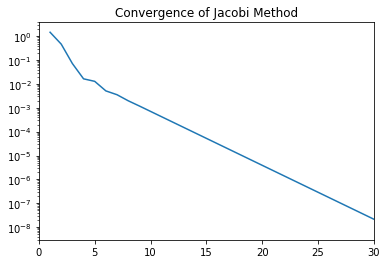

array([1.        , 1.        , 0.30555555, 0.04166667, 0.2361111 ,
       0.65277777])

In [7]:
Jacobi(A, b, 1e-8, 1000, True)

# Problem 3

In [8]:
def Gauss_seidel(A, b, tol, maxiters, plot = False):
    m, n = A.shape
    D = np.diag(A)
    x0 = np.zeros_like(b)
    x1 = np.zeros_like(b)
    error = np.zeros(maxiters)
    dist = 10
    count = 0
    while (dist > tol) and (count<maxiters):
        temp = np.copy(x0)
        for i in range(n):
            x1[i] = x0[i] + (b[i] - np.dot(A[i,:],x0))/A[i,i]
        dist = la.norm(x1 - temp)
        error[count] = dist
        count += 1
        x0 = x1
    if plot == True :
        plt.semilogy(np.arange(1, maxiters+1), error)
        plt.title('Convergence of Gauss-Seidel Method')
        plt.xlim(0, 15)
        plt.show()
      
    return x0



        

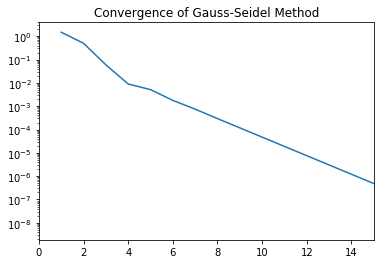

True

In [9]:
x = Gauss_seidel(A, b, 1e-8, 1000, True)        
np.allclose(A@x, b)
    

# Problem 4

In [10]:
from scipy import sparse
def sparce_gauss(A, b, tol, maxiters):
    m, n = A.shape
    D = np.diag(A)
    x0 = np.zeros_like(b)
    dist = 10
    count = 0
    x1 = np.zeros_like(x0)
    while (dist > tol) and (count<maxiters):
        temp = np.copy(x0)
        for i in range(n):
            x1[i] = x0[i] + (b[i] - np.dot(A[i,:],x0))/A[i,i]
        dist = la.norm(x1 - temp)
        count += 1
        x0 = x1             
    return x0                       
                             

                
                             
                             
                
                    

In [11]:
A = diag_dom(5)
b = np.ones(5)

np.allclose(A@sparce_gauss(A, b, 1e-8, 1000), b)
                             

True

# Problem 5 

In [35]:
def SOR(A, b, tol  , maxiters, omega):
    m, n = A.shape
    D = np.diag(A)
    x0 = np.zeros_like(b)
    dist = 10
    count = 0
    x1 = np.zeros_like(x0)
    while (dist > tol) and (count<maxiters):
        temp = np.copy(x0)
        for i in range(n):
            x1[i] = x0[i] + (b[i] - np.dot(A[i,:],x0))/A[i,i]*omega
        dist = la.norm(x1 - temp)
        count += 1
        x0 = x1
    return x0, count



In [37]:
A = diag_dom(5)
b = np.ones(5)
x = SOR(A, b, 1e-8, 10000, 1.5)        
np.allclose(A@x[0], b)

True

# Problem 7

In [29]:
omega = np.linspace(1, 1.95, 20)

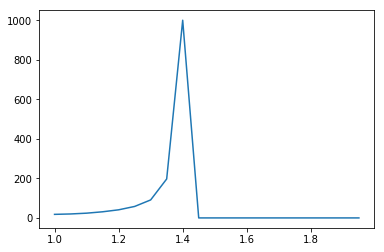

In [41]:
A = diag_dom(50)
b = np.ones(50)
n = np.zeros(20)
for i in range(9):
    #print(SOR(A, b, 1e-8, 10000, omega[i])[1])
    n[i] = SOR(A, b, 1e-8, 1000, omega[i])[1]
#print(n)
plt.plot(omega,n)